<a href="https://colab.research.google.com/github/harpreetanandsingh/NESAC_Project/blob/main/ZSL_UAV_SAT_SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero-Shot Image Segmentation For Disaster Mitigation

This notebook shows how to segment satellite and UAV imagery using the Segment Anything Model (SAM)

Make sure you use GPU runtime for this notebook. For Google Colab, go to `Runtime` -> `Change runtime type` and select `GPU` as the hardware accelerator.

## Install dependencies

Uncomment and run the following cell to install the required dependencies.


In [1]:
%pip install segment-geospatial groundingdino-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 118.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.9 MB/s eta 0:00:00
  Created wheel for groundingdino-py: filename=groundingdino_py-0.4.0-py2.py3-none-any.whl size=88739 sha256=42f5d38e40c5c6133bf0c76b10d84894c6711d5084074e21

## Import libraries

In [2]:
import cv2
import numpy as np
import torch
from matplotlib import pyplot as plt
import samgeo as samsam
from samgeo.text_sam import LangSAM
from PIL import Image

##Select Image and Display

In [52]:
image = '/content/flood_image0280.jpg'
# img_in = cv2.imread(image,1)
# plt.imshow(img_in)
# plt.axis("off")
# plt.show()

## Initialize LangSAM class

In [4]:
sam = LangSAM()

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:13<00:00, 190MB/s]


## Input Text Prompt

In [49]:
text_prompts = ["water", "built up", "vegetation"]
out_masks = []
# overlays = []
# img = cv2.imread(image)
# im = Image.fromarray((img * 255).astype(np.uint8))
# sam.predict(image, 'water', box_threshold=0.25, text_threshold=0.5)
# sam.show_anns(
#     cmap="Greys_r",
#     add_boxes=False,
#     alpha=1,
#     title='Automatic Segmentation ',
#     output='tes.tif',
#   )

## Segment the Image

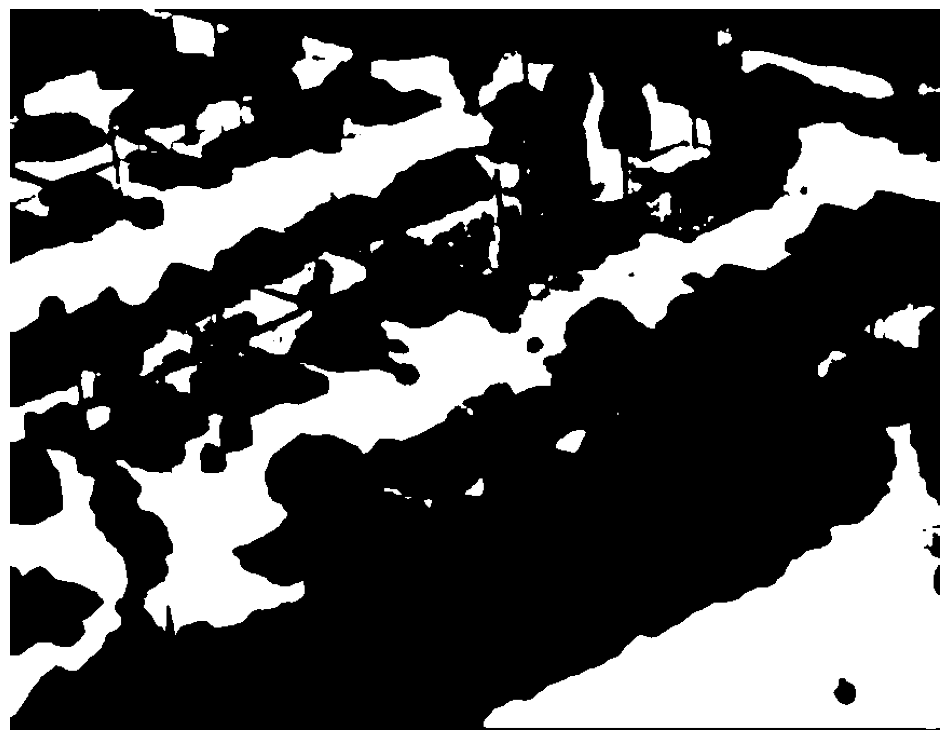

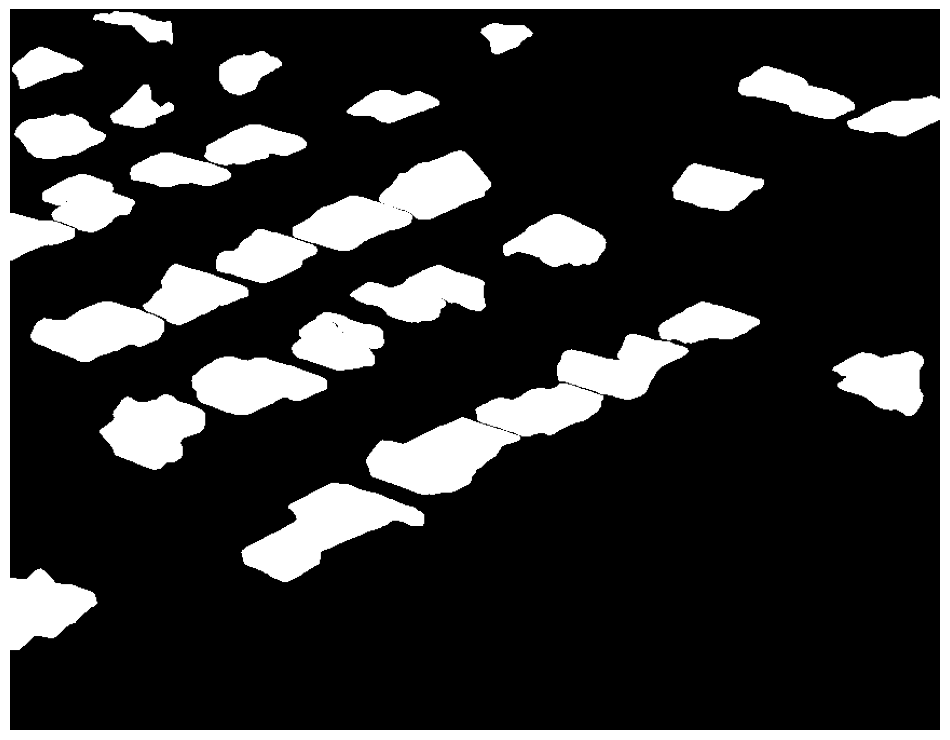

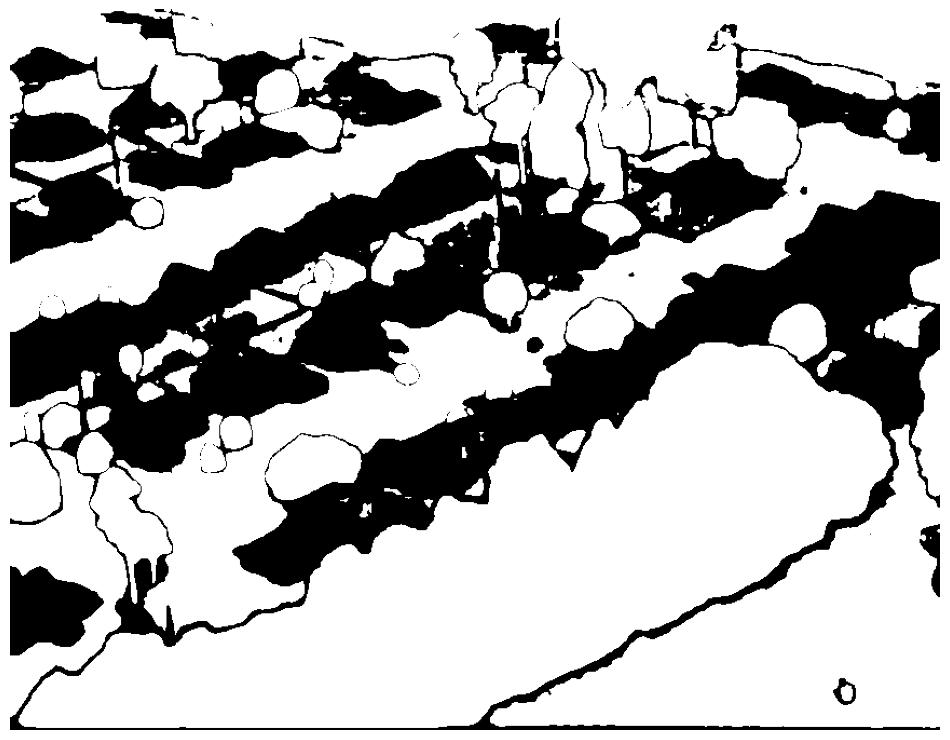

In [53]:
out_masks = []
sam.predict(image, 'flood', box_threshold=0.3, text_threshold=0.24)
  # overlays.append(sam.prediction)
sam.show_anns(
  cmap="Greys_r",
  add_boxes=False,
    alpha=1,
    # title='Automatic Segmentation of '+i,
    output='sentinel2-water.tif',
    blend = True,
)
img = Image.open('sentinel2-water.tif')
out_masks.append(img)
img.save('sentinel2-water.png')
sam.predict(image, 'buildings', box_threshold=0.3, text_threshold=0.24)
  # overlays.append(sam.prediction)
sam.show_anns(
  cmap="Greys_r",
  add_boxes=False,
    alpha=1,
    # title='Automatic Segmentation of '+i,
    output='sentinel2-buildings.tif',
    blend = True,
)
img = Image.open('sentinel2-buildings.tif')
out_masks.append(img)
img.save('sentinel2-building.png')
sam.predict(image, 'tree', box_threshold=0.2, text_threshold=1)
  # overlays.append(sam.prediction)
sam.show_anns(
  cmap="Greys_r",
  add_boxes=False,
    alpha=1,
    # title='Automatic Segmentation of '+i,
    output='sentinel2-tree.tif',
    blend = True,
)
img = Image.open('sentinel2-tree.tif')
out_masks.append(img)
img.save('sentinel2-tree.png')
# print(the_mask.size)

# sus = overlays[0]
# for i in range(0,len(overlays)):
#   # sus = sus | overlays[i]
#   arr_ = np.squeeze(overlays[i]) # you can give axis attribute if you wanna squeeze in specific dimension
#   plt.imshow(arr_)
#   plt.show()

## Display Annotated Image
###With bounding boxes

(740, 950, 4)

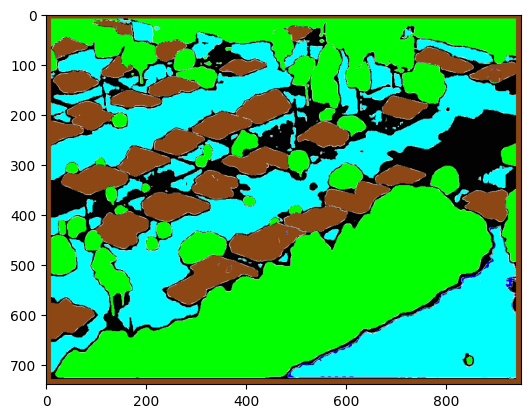

In [54]:
# colors = []
def change_color(r1,g1,b1,r2,g2,b2,data):

  red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
  mask = (red == r1) & (green == g1) & (blue == b1)
  data[:,:,:3][mask] = [r2, g2, b2]


new_masks = []
for i in range(len(out_masks)):
  temp = out_masks[i].convert('RGBA')
  new_masks.append(np.array(temp))

change_color(255,255,255,0,0,255,new_masks[0])
change_color(255,255,255,139,69,19,new_masks[1])
change_color(255,255,255,0,255,0,new_masks[2])
# change_color(255,255,255,255,0,0,new_masks[3])

final_mask = new_masks[0]+new_masks[1]+new_masks[2]
plt.imshow(final_mask)


# data = np.array(im)   # "data" is a height x width x 4 numpy array
# red, green, blue, alpha = data.T # Temporarily unpack the bands for readability

# # Replace white with red... (leaves alpha values alone...)
# white_areas = (red == 255) & (blue == 255) & (green == 255)
# data[..., :-1][white_areas.T] = (255, 0, 0) # Transpose back needed





# arr_ = np.squeeze(sus) # you can give axis attribute if you wanna squeeze in specific dimension
# plt.imshow(arr_)
# plt.show()
# sam.show_anns(
#     cmap='Greens',
#     box_color='red',
#     title='Automatic Segmentation of Trees',
#     blend=True,
# )
new_masks[0].shape

### GreyScale

And save the results in a GeoTIFF file

In [8]:
sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Automatic Segmentation of '+text_prompt,
    blend=False,
    output=text_prompt+'.tif',
)

NameError: ignored

##Show PNG

In [9]:
img = Image.open(text_prompt+'.tif')
img.save('my.png')
img.show()

NameError: ignored

In [10]:
# Custom show_anns to merge images

def showw_anns(
    self,
    figsize=(12, 10),
    axis="off",
    alpha=0.35,
    output=None,
    blend=True,
    **kwargs,
):
    """Show the annotations (objects with random color) on the input image.

    Args:
        figsize (tuple, optional): The figure size. Defaults to (12, 10).
        axis (str, optional): Whether to show the axis. Defaults to "off".
        alpha (float, optional): The alpha value for the annotations. Defaults to 0.35.
        output (str, optional): The path to the output image. Defaults to None.
        blend (bool, optional): Whether to show the input image. Defaults to True.
    """

    import matplotlib.pyplot as plt

    anns = self.masks

    if self.image is None:
        print("Please run generate() first.")
        return

    if anns is None or len(anns) == 0:
        return

    plt.figure(figsize=figsize)
    plt.imshow(self.image)

    sorted_anns = sorted(anns, key=(lambda x: x["area"]), reverse=True)

    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones(
        (
            sorted_anns[0]["segmentation"].shape[0],
            sorted_anns[0]["segmentation"].shape[1],
            4,
        )
    )
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann["segmentation"]
        color_mask = np.concatenate([np.random.random(3), [alpha]])
        img[m] = color_mask
    ax.imshow(img)

    if "dpi" not in kwargs:
        kwargs["dpi"] = 100

    if "bbox_inches" not in kwargs:
        kwargs["bbox_inches"] = "tight"

    plt.axis(axis)

    self.annotations = (img[:, :, 0:3] * 255).astype(np.uint8)

    if output is not None:
        if blend:
            array = blend_images(
                self.annotations, self.image, alpha=alpha, show=False
            )
        else:
            array = self.annotations
        array_to_image(array, output, self.source)